## Creating synthetic population

On this tutorial we will show how to use our synthetic population module.

So, first things first, we are going to build our Tradesman model, but instead of using our ```model()``` method, our model will be a bit more simple, with political boundaries and subdivisions, population, population by sex and age, and traffic assignment zones (TAZs).

In [1]:
import warnings 
warnings.filterwarnings("ignore")

from tradesman.model import Tradesman

from os.path import join
from tempfile import gettempdir
from uuid import uuid4


In [2]:
folder = join(gettempdir(), uuid4().hex)

model_place = "San Marino"

project = Tradesman(network_path=folder, model_place=model_place)

In [3]:
project.add_country_borders()

project.import_subdivisions("geoboundaries", 2, True)

project.import_population()

project.build_zoning()

project.import_pop_by_sex_and_age()


Expect 5,472 total hexbins for this bounding box
Done 0/9 states
1


Now we are going to add the data necessary to create our synthetic population. 

The data necessary to create the synthetic population is gathered on the fly, so you don't have to worry about doing this exhaustive task. 

In [4]:
project.build_population_synthesizer_data()

Calculated vs Expected percentual of households per size in the sample

# Person      Calculated    Expected
----------  ------------  ----------
1 person           30.58       31.1
2-3 person         48.11       46.56
4-5 person         20.27       21.29
6+ person           1.03        1.05

Difference in calculated vs expected percentual of households in the sample

# Person      Diff.
----------  -------
1 person      -0.52
2-3 person     1.55
4-5 person    -1.02
6+ person     -0.02



But let's suppose you have our own zoning systems, our own data, or you don't like the existing controls. What can you do to use our own data? 

It's quiet simple: you can use one of the functions of user_control_import and change the files used to create the synthetic population. But be careful! **You must keep consistency across all files, otherwise PopulationSim will not be able to create the synthetic population.**

Suppose you don't like the default controls. There are too many age brackets per sex, and you want to add some controls you believe are relevant and are not in the default file. What can you do?

It is possible for you to create your own control file and overwite the default one with the following function.

**But be careful!** If you change the controls, you <span style="color:red"> must </span>change the validation parameters, as we will see later on, otherwise populationsim will fail to create the synthetic population.

In [5]:
from tradesman.model_creation.synthetic_population.user_control_import import *

In [ ]:
user_change_controls(overwrite=True, 
                     scr_file="../path/to/new/control/file.csv", 
                     dest_folder=join(folder, "population")) 

Now, let's say you want to create synthetic populations with more information, rather than just age, sex, occupation and journey to work, as well as synthetic households with more information than just number of persons and average household income. What can you do?

In [ ]:
user_change_settings(overwrite=True,
                     household_settings=['NEW_HH_SETTING_1', "NEW_HH_SETTING_2"],
                     persons_settings=['NEW_PP_SETTING_1', "NEW_PP_SETTING_2", "NEW_PP_SETTING_3"],
                     dest_folder=join(folder, "population"))


Ok. We've been changing controls and adding more information to our synthetic population. But let's suppose now that you have added information to the control file that don't exist in the current seed population and household files, or you have an up to date seed that suits your purpose well. 

To use your own data, you can change the current seeds!

In [ ]:
user_change_seeds(overwrite=True,
                  household_seed_path="../path/to/new/household/seeds.csv",
                  persons_seed_path="../path/to/new/persons/seeds.csv",
                  dest_folder=join(folder, "population"))


We've been doing a nice work so far, and I believe you've already understood that if you change to your files, you must keep consistency of your changes across all other files! So, let's continue our tutorial.

Suppose that your data has other geographies rather than our's TAZ < PUMA < REGION. To replace the current geographies, you can use the following funciton:


In [ ]:
user_change_geographies(overwrite=True,
                        seed_geography="COUNTY",
                        upper_geography="STATE",
                        lower_geography="DISTRICT",
                        dest_folder=join(folder, "population"))


As you might have changed some files, we must update the control files to keep consistency. With the following command, you can add your own controls to the model.

In [ ]:
user_import_new_totals(overwrite=True,
                       totals_lower_level="../path/to/new/control_totals_taz.csv",
                       totals_upper_level="../path/to/new/control_totals_meta.csv",
                       geographies="../path/to/new/geo_cross_walk.csv",
                       dest_folder=join(folder, "population"))


Later, you must check if our validation parameters are consistent with both geographies and controls previously used. If not, you can change the controls manually.

In [ ]:
user_change_validation_parameters(overwrite=True,
                                  model_place=model_place,
                                  dest_folder=join(folder, "population"),
                                  aggregate_summaries=[{"name": "citzenship_status",
                                                        "geography": "COUNTY",
                                                        "control": "citz_status_control", "result": "citz_status_result"},
                                                       {"name": ""}],
                                  geographies=["STATE", "COUNTY", "DISTRICT"])


Finally, after we are done with the input files, we can create our synthetic poupulation.

We can run our model multi-threaded or single threaded. Let's suppose we want to run our model with two threads, instead of a single one.

<span style="color:red">**WARNING:** </span>depending on the number of TAZs, populationsim can take quite a long time to create the synthetic population due to model's fragmentation even with multiple threads. This happens because currently we only have data in TAZ level. So please, be a little patient, and check out the documentation for more information about this matter.


In [6]:
project.synthesize_population()

After finishing the creation of synthetic persons and households, we can validate our results.

The following function will display the validation of controlled and non-controlled variables, and the files with the pictures displayed here can be find at the model's folder.

In [14]:
from tradesman.model_creation.synthetic_population.create_synthetic_population import validate_synthetic_population


Households with at least one member in the range (percentage)
found | expected
Under 15
23.58  |  22.63
Under 18
28.78  |  26.26
Under 20
31.11  |  28.81
Over 60
43.05  |  45.78
Over 65
34.91  |  36.82
Households with members in age range (percentage)
found | expected
Under 15 and 60 years and older
1.40  |  1.68
Under 15 and 65 years and older
1.21  |  1.22
Under 18 and 60 years and older
2.43  |  2.07
Under 18 and 65 years and older
1.72  |  1.45
Under 20 and 60 years and older
2.61  |  2.45
Under 20 and 65 years and older
1.90  |  1.63


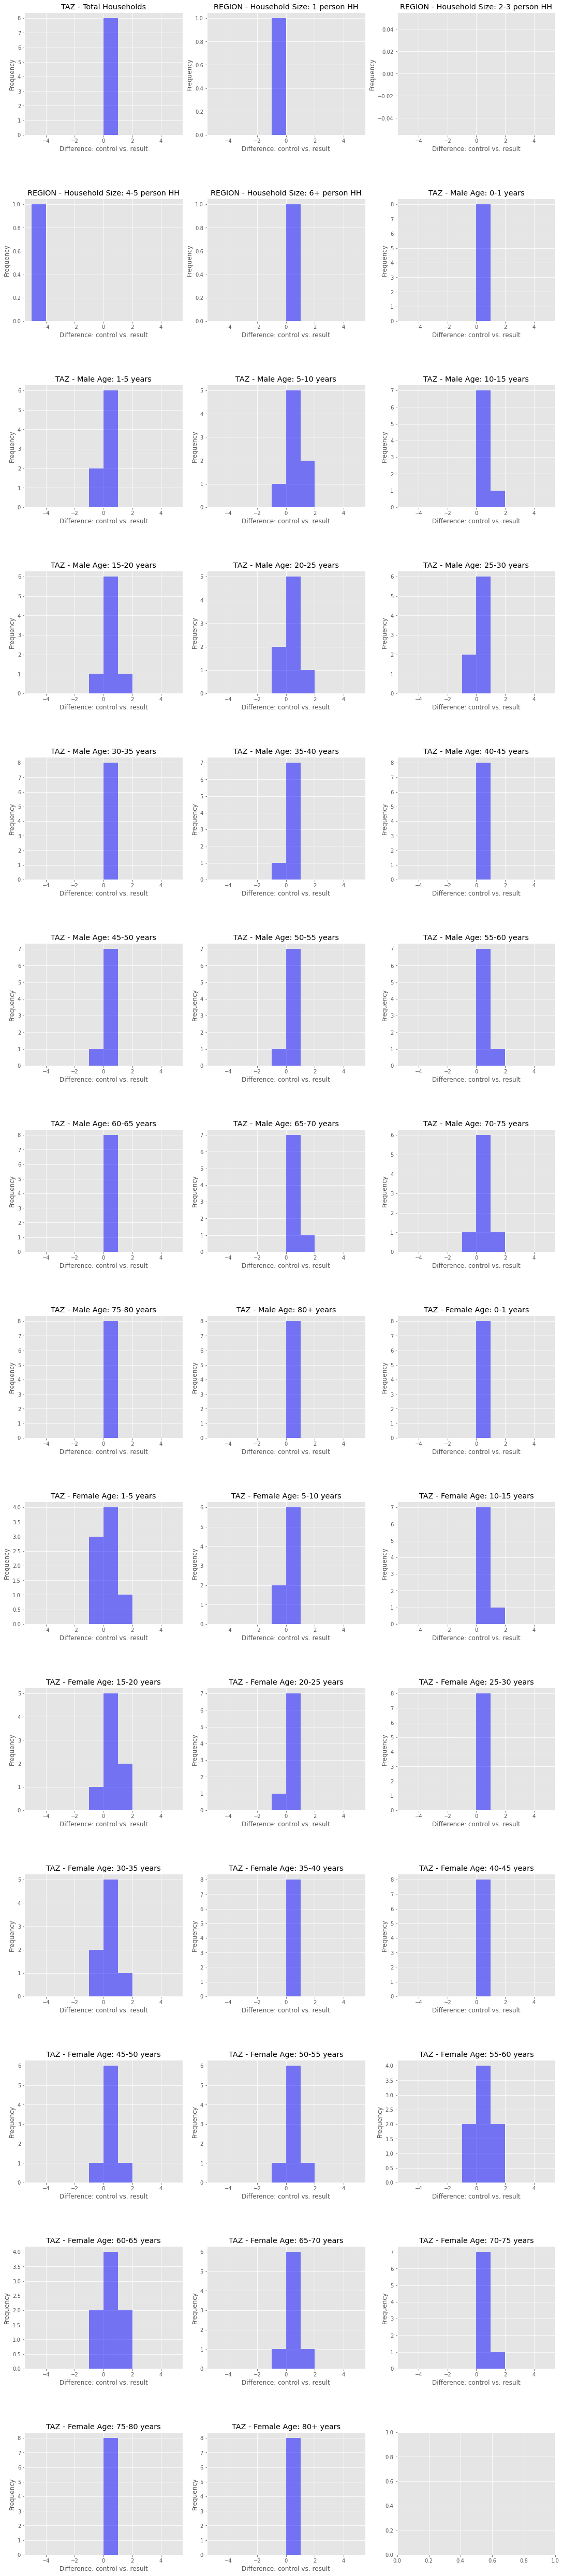

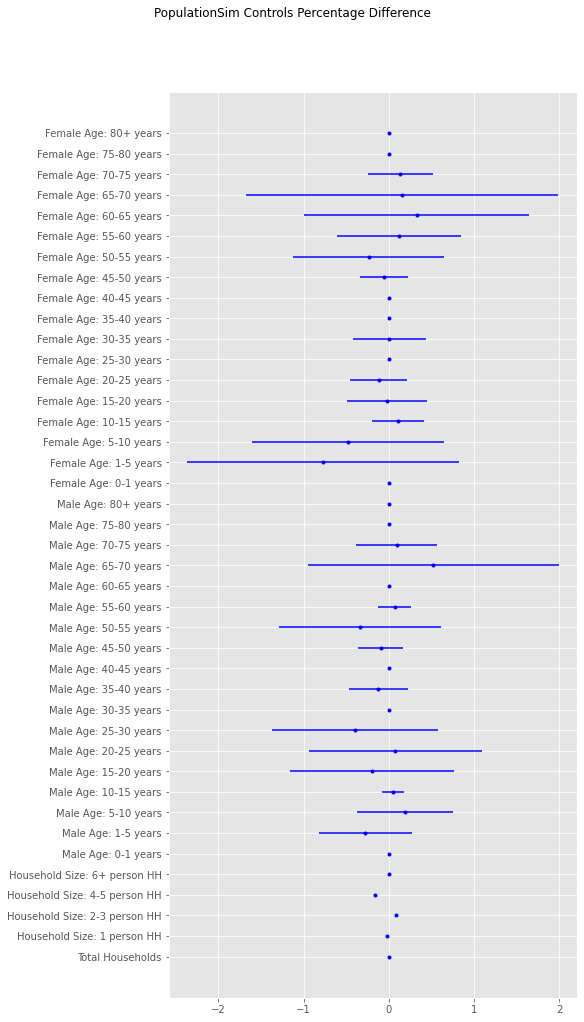

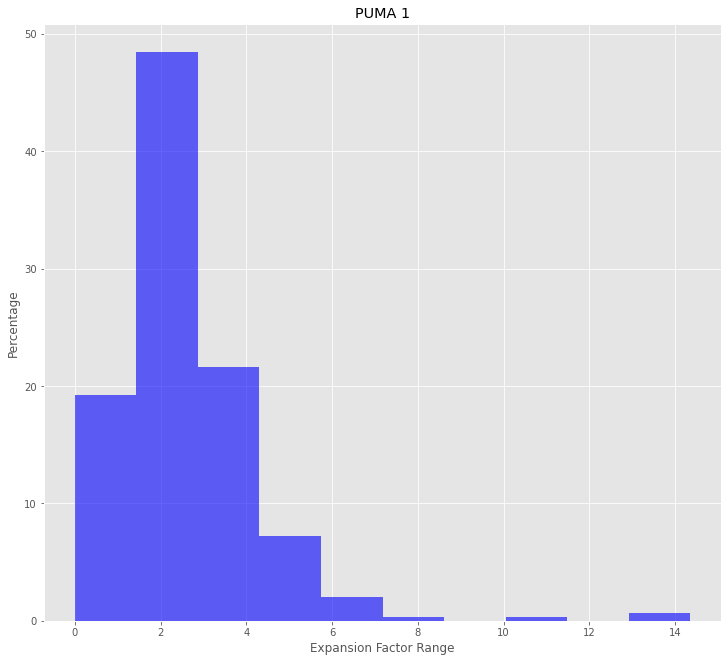

In [15]:
validate_synthetic_population(model_place=model_place, folder=folder)

Now we have finished our little tutorial about Tradesman's creation of synthetic population.

See you in a next tutorial!